# Lab 5 Exercise


## Outline 

1. Get data into Python Notebook
   * Open files from local file system
   * Open files from Web
  
2. Preprocess data
    * Pandas

3. Visualize data
    * **matplotlib**
    * **seaborn**

4. References

## 1. Get data into Python


[Download Data](https://gist.githubusercontent.com/wjidea/9617d9f9d36ce6343124f538709332ab/raw/ec71e921ee43b02d8ec830d0f758482f459bef92/iris_data.csv)

This is OPTIONAL. Only if you are interested in seeing the data on your local computer programs, such as MS Excel.

### Iris dataset

Source: https://archive.ics.uci.edu/ml/datasets/iris  
About: https://en.wikipedia.org/wiki/Iris_flower_data_set

<img src="http://drive.google.com/uc?export=view&id=1-OZp7Bw4sNE2Qpk2o6StvVSHn4Vb0zly" width="700" />

<!-- ![alt text](http://drive.google.com/uc?export=view&id=1-OZp7Bw4sNE2Qpk2o6StvVSHn4Vb0zly)  -->

In [23]:
# Download data into local directory
!curl -s -H 'Accept: application/vnd.github.v3.raw+csv' -o 'iris_data.csv' \
https://gist.githubusercontent.com/wjidea/9617d9f9d36ce6343124f538709332ab/raw/ec71e921ee43b02d8ec830d0f758482f459bef92/iris_data.csv

## 2. Data Processing


### Import dependent packages and load data

In [24]:
import numpy as np
import pandas as pd
iris_data = pd.read_csv('iris_data.csv')

In [25]:
iris_data.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
iris_data[50:].head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [27]:
iris_data[100:].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [28]:
iris_data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [29]:
iris_data.groupby('species').std()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,0.352490,0.381024,0.173511,0.107210
versicolor,0.516171,0.313798,0.469911,0.197753
virginica,0.635880,0.322497,0.551895,0.274650


In [30]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data reshape

In [31]:
df2 = pd.melt(iris_data, id_vars=['species'], value_vars=['petal_width','petal_length','sepal_width','sepal_length'])

In [32]:
df2.head()

,species,variable,value
0,setosa,petal_width,0.2
1,setosa,petal_width,0.2
2,setosa,petal_width,0.2
3,setosa,petal_width,0.2
4,setosa,petal_width,0.2


## 3. Data Visualization
  *   matplotlib
  *   seaborn

In [33]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

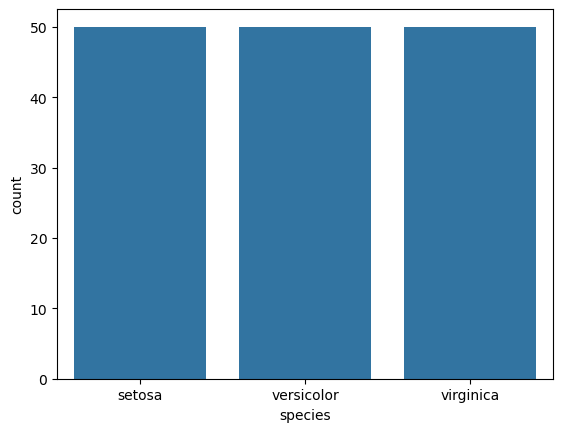

In [34]:
sns.countplot(iris_data, x="species")
plt.show()

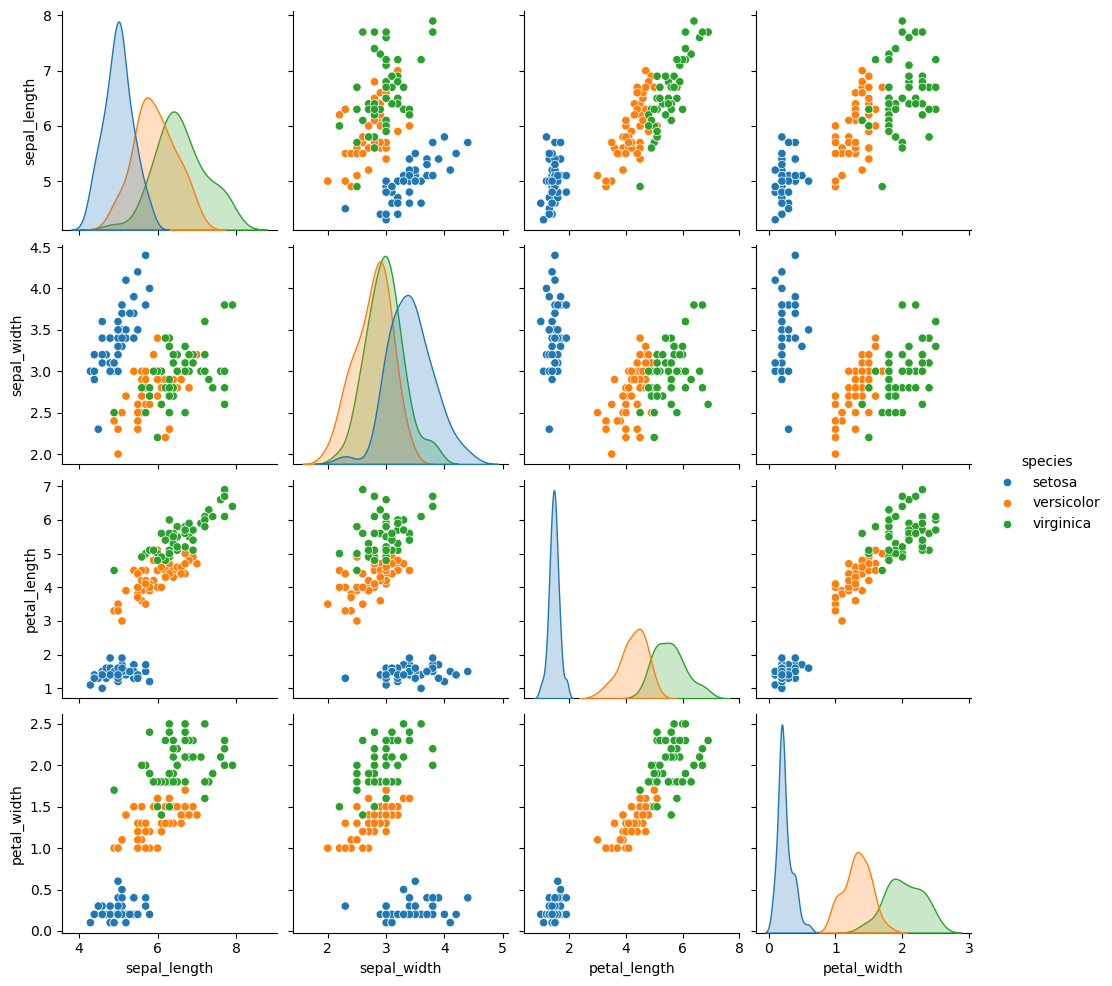

In [35]:
sns.pairplot(data=iris_data, kind='scatter', hue='species')
plt.show();

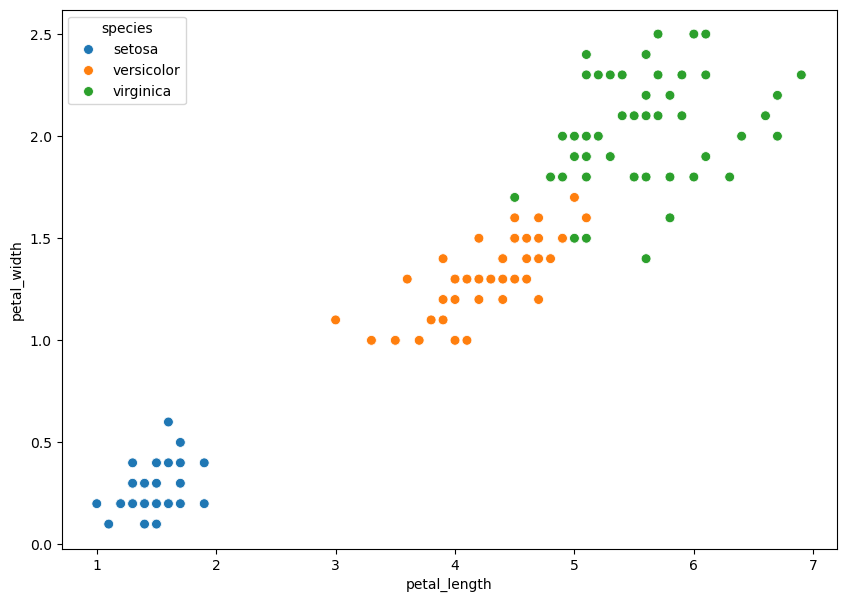

In [36]:
# get current figure Get the current figure, if no create Figure()
fig=plt.gcf()
fig.set_size_inches(10,7)
sns.scatterplot(x="petal_length", y="petal_width", data=iris_data, hue='species', s=50)
plt.show()

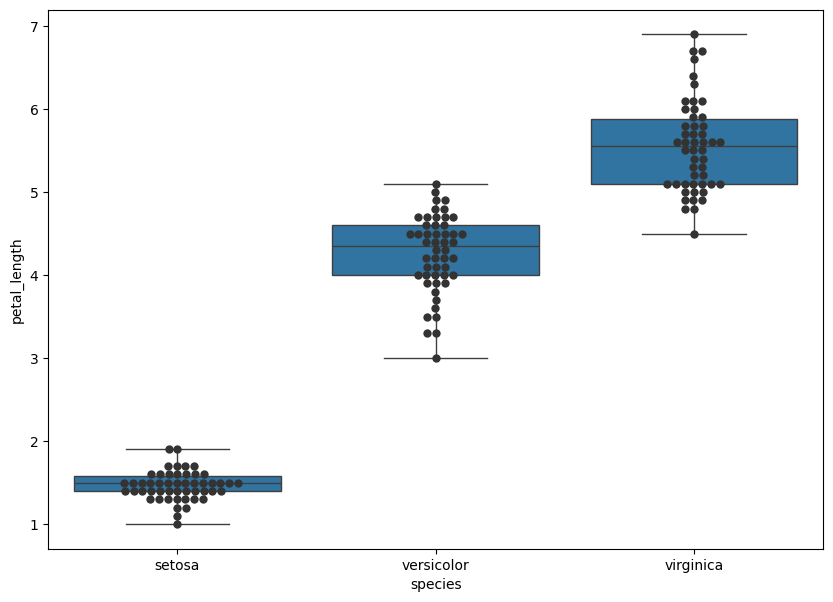

In [37]:
# get current figure Get the current figure, if no create Figure()
fig=plt.gcf()
fig.set_size_inches(10,7)
sns.boxplot(x="species", y="petal_length", data=iris_data, whis=np.inf);
sns.swarmplot(x="species", y="petal_length", data=iris_data, color="0.2", s=6)
plt.show()

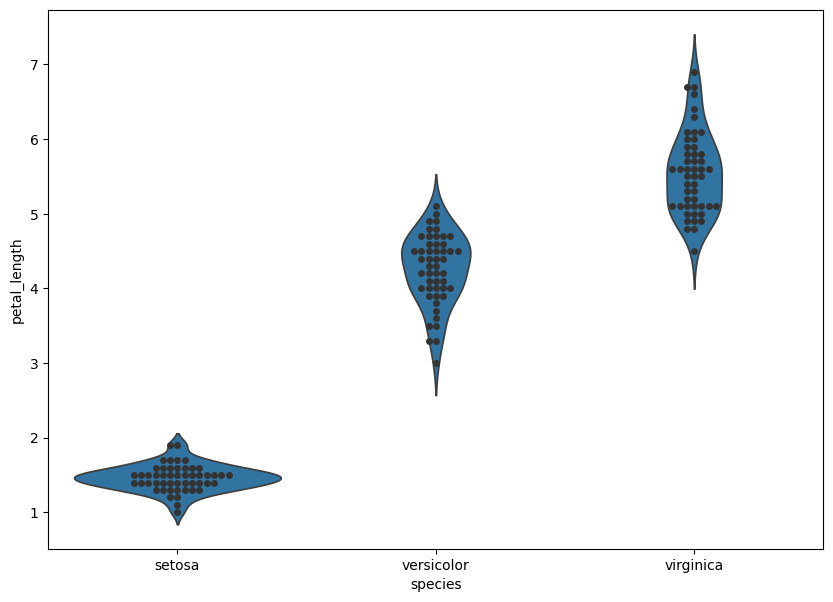

In [38]:
fig=plt.gcf()
fig.set_size_inches(10,7)
sns.violinplot(x="species", y="petal_length", data=iris_data, inner=None)
sns.swarmplot(x="species", y="petal_length", data=iris_data, color="0.2", edgecolor="black");
plt.show()

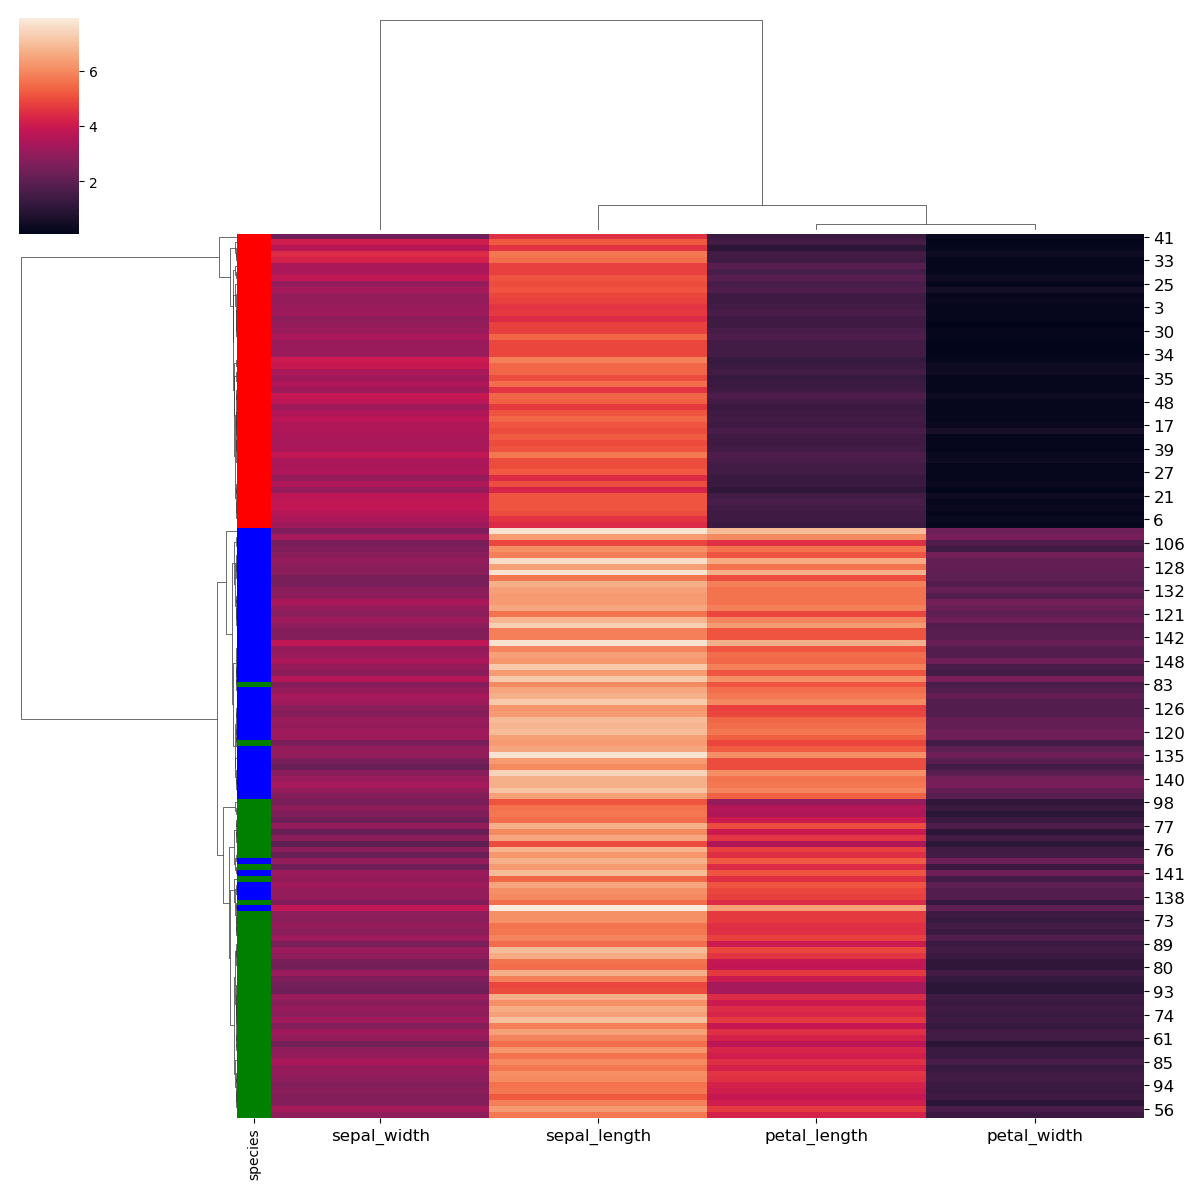

{'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}


In [39]:
# cluster map (dendogram and tree)
df = iris_data.iloc[:,:4]
df1 = iris_data.species
x = dict(zip(df1.unique(),"rgb"))
row_colors = df1.map(x)
cg = sns.clustermap(df,row_colors=row_colors,figsize=(12, 12),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0,size =12)
plt.setp(cg.ax_heatmap.xaxis.get_majorticklabels(),rotation = 0,size =12)
plt.show()
print(x)

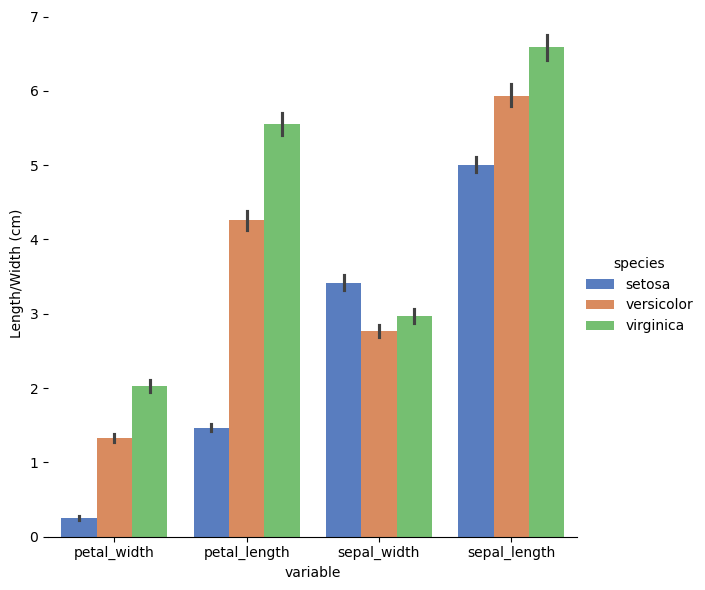

In [40]:
# bar plot
g = sns.catplot(x="variable", y="value", hue="species", data=df2,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Length/Width (cm)");
plt.show()

## **Summary**

1. load data into colab notebook
2. data manipulation with Pandas
3. Plotting data with Matplotlib and Seaborn

# Sandbox

In [21]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_data.tail()

In [ ]:
iris_data.describe()

In [ ]:
iris_data.info()

In [ ]:
iris_data['sepal_length']

In [ ]:
iris_data[0:3]

In [ ]:
iris_data.loc[0:4, 'sepal_length']

In [ ]:
iris_data.loc[:, 'sepal_width']

In [ ]:
iris_data.loc[0, 'sepal_width']

In [ ]:
iris_data.iloc[0:5, :]

In [ ]:
iris_data.iloc[0, 0]

In [ ]:
iris_data[iris_data.sepal_length>7]

In [ ]:
iris_data[iris_data["species"].isin(['setosa', 'virginica'])]

In [ ]:
iris_data["species"].isin(['setosa', 'virginica'])

In [ ]:
sns.regplot(data=iris_data, x="sepal_length", y="petal_length");


In [41]:
from collections import Counter

In [42]:
Counter(iris_data.sepal_length > 7)

Counter({False: 138, True: 12})

In [36]:
import pandas as pd

df = pd.DataFrame({
    'sepal_length': [5.1, 4.9, 4.7, 4.6],
    'sepal_width': [3.4, 3.5, 3.2, 3.1],
    'petal_length': [1.4, 1.4, 1.3, 1.5],
    'petal_width': [0.2, 0.2, 0.2, 0.2],
    'species': ['setosa','setosa','setosa','setosa']
})


In [37]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.4,1.4,0.2,setosa
1,4.9,3.5,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [49]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA 
model = ols('sepal_length ~ C(species)', data=iris_data).fit() 
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(species),63.212133,2.0,119.264502,1.669669e-31
Residual,38.956200,147.0,NaN,NaN
